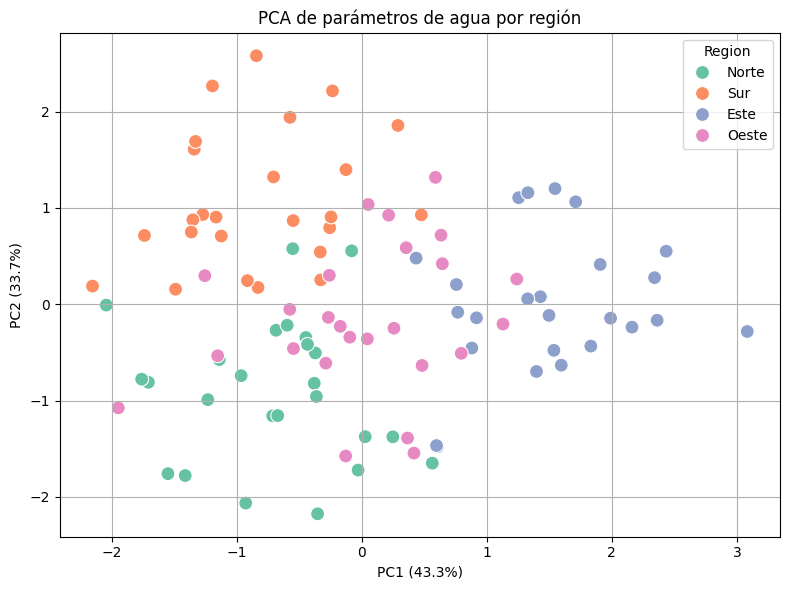

In [1]:
# 📦 Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# 🔧 Simulación de datos
np.random.seed(0)

regiones = ['Norte', 'Sur', 'Este', 'Oeste']
datos = []

for region in regiones:
    for _ in range(25):  # 25 muestras por región
        turbidez = np.random.normal(loc=5 if region == 'Sur' else 2, scale=1.5)
        conductividad = np.random.normal(loc=300 if region == 'Este' else 150, scale=30)
        ph = np.random.normal(loc=7 if region == 'Norte' else 6.5, scale=0.3)
        datos.append([region, turbidez, conductividad, ph])

df = pd.DataFrame(datos, columns=['Region', 'Turbidez', 'Conductividad', 'pH'])

# 🎯 Variables numéricas
X = df[['Turbidez', 'Conductividad', 'pH']]
X_scaled = StandardScaler().fit_transform(X)

# ⚙️ PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 📊 DataFrame con componentes
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Region'] = df['Region']

# 🌈 Visualización
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Region', s=100, palette='Set2')
plt.title('PCA de parámetros de agua por región')
plt.grid(True)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.tight_layout()
plt.show()
